In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Paths to your ZIP files
fake_zip = "/content/drive/MyDrive/Datasets/Fake.csv.zip"
true_zip = "/content/drive/MyDrive/Datasets/True.csv.zip"

# Create dataset folder
os.makedirs("dataset", exist_ok=True)

# Extract Fake.zip
with zipfile.ZipFile(fake_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Extract True.zip
with zipfile.ZipFile(true_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check extracted files
print("Extracted files:", os.listdir("dataset"))

Extracted files: ['True.csv', 'Fake.csv']


In [3]:
import pandas as pd

fake_df = pd.read_csv("dataset/Fake.csv")
true_df = pd.read_csv("dataset/True.csv")

In [4]:
print("✅ Fake News Data:")
fake_df.head()

✅ Fake News Data:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print("\n✅ True News Data:")
true_df.head()


✅ True News Data:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print(fake_df.columns)
print(true_df.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [7]:
#checking subjects counts
print(fake_df['subject'].value_counts())
print(true_df['subject'].value_counts())

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


In [8]:
#create a category fake/true
fake_df['category'] = 1
true_df['category'] = 0

In [9]:
print(fake_df.columns)
print(true_df.columns)

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')


In [10]:
#merge the two dataframe and resseting index
df = pd.concat([fake_df, true_df]).reset_index(drop=True)

In [11]:
df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [12]:

df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Category counts:
category
1    23481
0    21417
Name: count, dtype: int64


/tmp/ipython-input-2937588019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette="Set2")


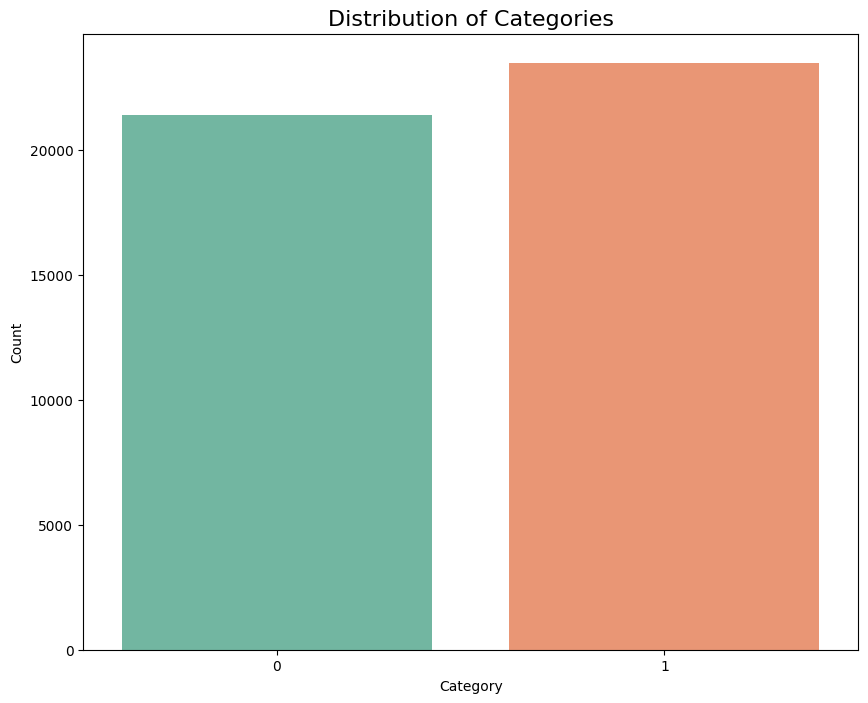

In [14]:
# Print labels and their counts
print("Category counts:")
print(df['category'].value_counts())

# Plot
plt.figure(figsize=(10,8))
sns.countplot(x='category', data=df, palette="Set2")

plt.title("Distribution of Categories", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

Subject counts:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


/tmp/ipython-input-2423478816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df, palette="Set3")


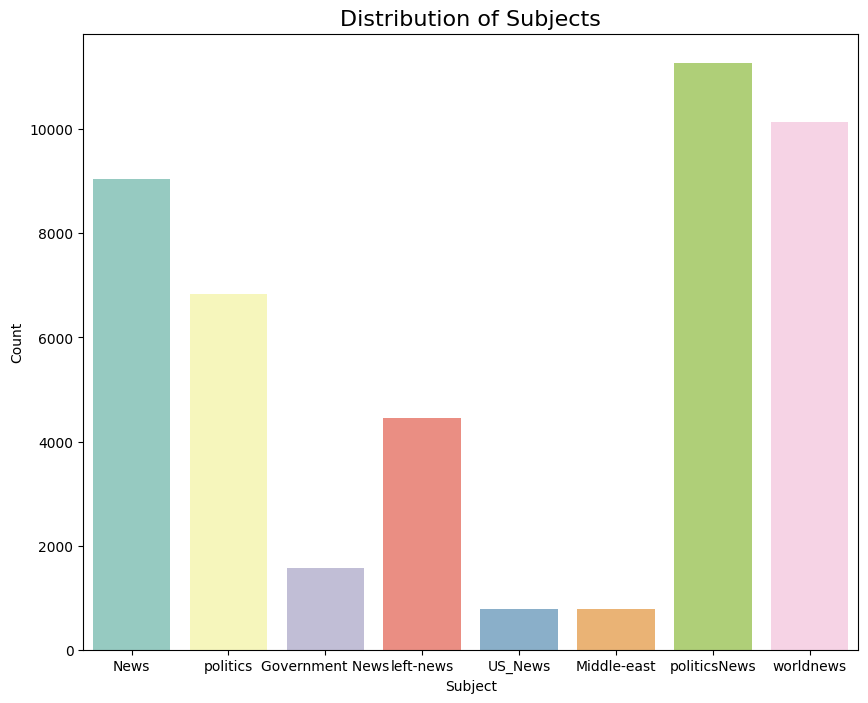

In [15]:
# Print labels and their counts
print("Subject counts:")
print(df['subject'].value_counts())

# Plot
plt.figure(figsize=(10,8))
sns.countplot(x='subject', data=df, palette="Set3")

plt.title("Distribution of Subjects", fontsize=16)
plt.xlabel("Subject")
plt.ylabel("Count")
plt.show()


In [16]:
# Keep only text and category columns
df = df[['text', 'category']]
print(df.columns)
df.head()

Index(['text', 'category'], dtype='object')


,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


**Data Cleaning**

In [17]:
# Check if there are any null values in the dataset
print("Null values per column:")
print(df.isnull().sum())

# Check total null values
print("\nTotal null values in dataset:", df.isnull().sum().sum())

Null values per column:
text        0
category    0
dtype: int64

Total null values in dataset: 0


In [18]:
# Count empty or whitespace-only strings in 'text'
empty_text_count = df['text'].str.strip().eq("").sum()

print("Number of empty strings in 'text' column:", empty_text_count)

blanks=[]
#index,label and review of the doc
for index,text in df["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list

len(blanks)

Number of empty strings in 'text' column: 631


631

In [19]:
df.shape

(44898, 2)

In [20]:
# Drop rows where 'text' is empty or only whitespace
df = df[df['text'].str.strip() != ""]
# df.drop(blanks,inplace=True)

print("After dropping empty rows, dataset size:", df.shape)

After dropping empty rows, dataset size: (44267, 2)


Text Cleaning

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re   # Regular expressions → used for pattern-based text cleaning (e.g., removing special characters)
import spacy  # Advanced NLP library → provides stopwords, tokenization, lemmatization
from nltk.corpus import stopwords  # NLTK → provides a standard list of English stopwords
from nltk.stem import WordNetLemmatizer  # NLTK → for lemmatization (reduces words to base/dictionary form)

# Load small English model in SpaCy (lightweight but powerful)
nlp = spacy.load("en_core_web_sm")

# Combine stopwords from NLTK and SpaCy into one set (ensures wider coverage of common stopwords)
stop_words = set(stopwords.words("english")) | nlp.Defaults.stop_words

# Initialize WordNet Lemmatizer from NLTK (for word normalization)
lemma = WordNetLemmatizer()


# --------------------------
# Text Cleaning Function
# --------------------------
def clean_text(text):
    """
    Cleans input text by:
    1. Lowercasing
    2. Handling common contractions
    3. Removing special characters, numbers, and extra spaces
    4. Removing stopwords
    5. Lemmatizing words
    """

    string = ""

    # 1. Convert to lowercase → makes text uniform
    text = text.lower()

    # 2. Handle contractions → expands short forms for better NLP understanding
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)

    # 3. Remove special characters, punctuation, and extra spaces → keeps only meaningful words
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)  # removes multiple spaces
    text = re.sub(r"[^a-zA-Z]", " ", text)   # keep only alphabets

    # 4 & 5. Remove stopwords + Lemmatize each word
    for word in text.split():
        if word not in stop_words:  # skip stopwords
            string += lemma.lemmatize(word) + " "  # lemmatize word (normalize)

    return string.strip()




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
df["clean_text"] = df["text"].apply(clean_text)

# Show first 5 rows to compare before vs after cleaning
print(df[["text", "clean_text"]].head())

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                          clean_text  
0  donald trump wish american happy new year leav...  
1  house intelligence committee chairman devin nu...  
2  friday revealed milwaukee sheriff david clarke...  
3  christmas day donald trump announced work foll...  
4  pope francis annual christmas day message rebu...  


Feature Extraction + Model Building


Training Logistic Regression...
Logistic Regression Accuracy: 0.9881
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4283
           1       0.99      0.99      0.99      4571

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



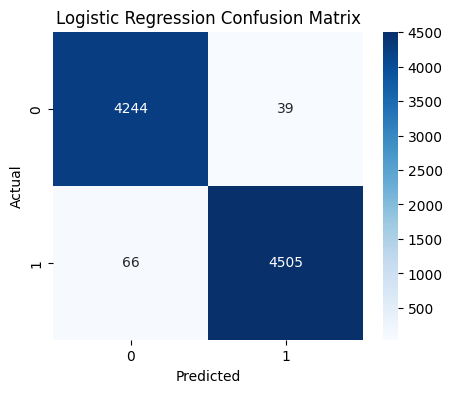


Training Naive Bayes...
Naive Bayes Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4283
           1       0.94      0.94      0.94      4571

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854



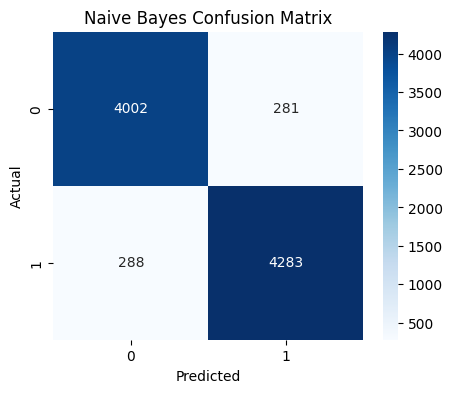


Training Random Forest...
Random Forest Accuracy: 0.9977
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4283
           1       1.00      1.00      1.00      4571

    accuracy                           1.00      8854
   macro avg       1.00      1.00      1.00      8854
weighted avg       1.00      1.00      1.00      8854



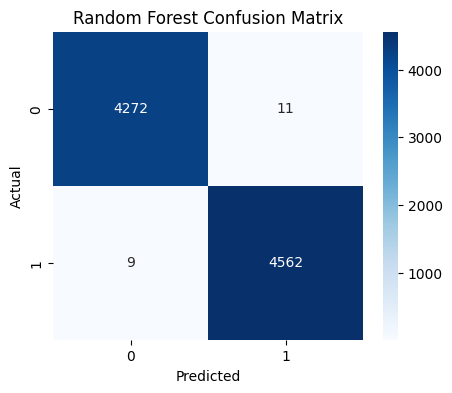


Training SVM...
SVM Accuracy: 0.9954
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4283
           1       1.00      0.99      1.00      4571

    accuracy                           1.00      8854
   macro avg       1.00      1.00      1.00      8854
weighted avg       1.00      1.00      1.00      8854



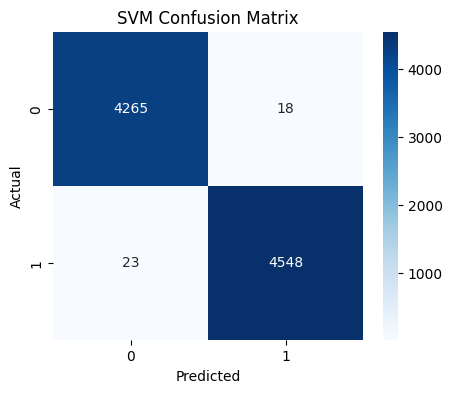

In [23]:
# 1. Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF for feature extraction
from sklearn.model_selection import train_test_split        # Splitting dataset
from sklearn.linear_model import LogisticRegression         # Logistic Regression
from sklearn.naive_bayes import MultinomialNB               # Naive Bayes
from sklearn.ensemble import RandomForestClassifier         # Random Forest
from sklearn.svm import SVC                                 # Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to numerical features
X = vectorizer.fit_transform(df['text']).toarray()
y = df['category']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train different models (added SVM)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear")   # Linear kernel works best for text classification
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Prediction using all models

In [24]:
def check_message(msg):
    msg_vector = vectorizer.transform([msg]).toarray()
    print(f"\nMessage: \"{msg}\"")
    print("="*50)
    for name, model in models.items():
        pred = model.predict(msg_vector)[0]
        print(f"{name} → Predicted category: {pred}")

# Example usage
check_message("Win a free iPhone now!!!")
check_message("Meeting scheduled tomorrow at 10 AM.")


Message: "Win a free iPhone now!!!"
Logistic Regression → Predicted category: 1
Naive Bayes → Predicted category: 1
Random Forest → Predicted category: 1
SVM → Predicted category: 1

Message: "Meeting scheduled tomorrow at 10 AM."
Logistic Regression → Predicted category: 1
Naive Bayes → Predicted category: 0
Random Forest → Predicted category: 1
SVM → Predicted category: 1
